In [1]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [13]:
# Read the dataset
advertising = pd.read_csv("C:\\Users\\asus\\Desktop\\sales\\advertising.csv")

advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [14]:
advertising.shape

(200, 4)

In [15]:
print(advertising.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [16]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [17]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


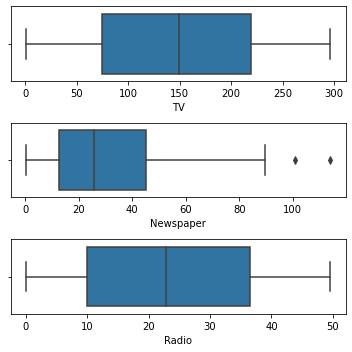

In [18]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

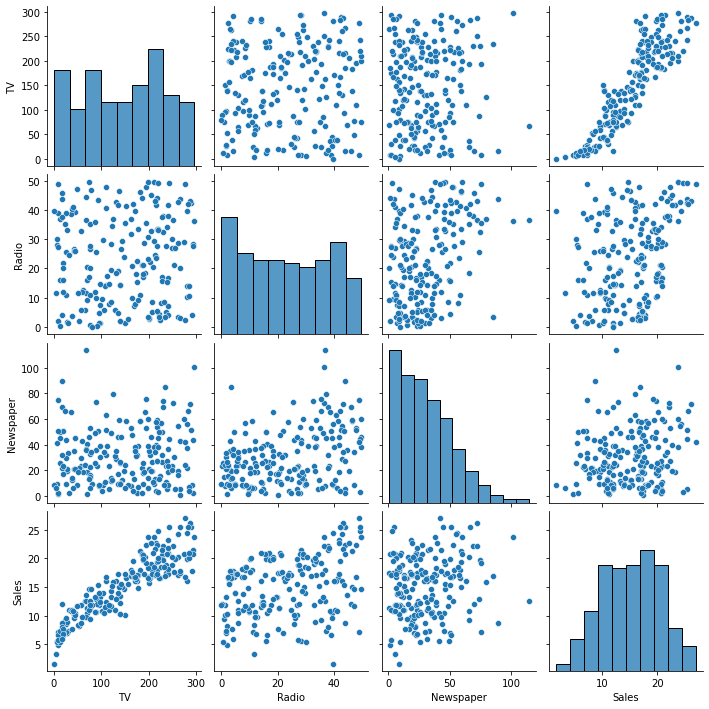

In [19]:
sns.pairplot(advertising, vars=['TV', 'Radio', 'Newspaper', 'Sales'])
plt.show()

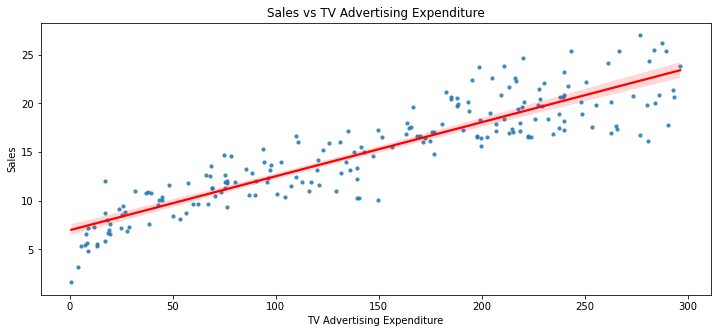

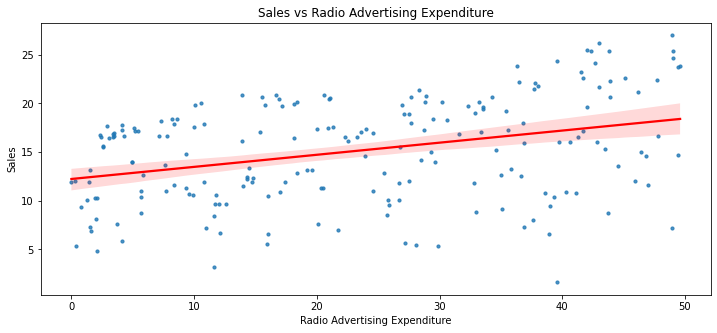

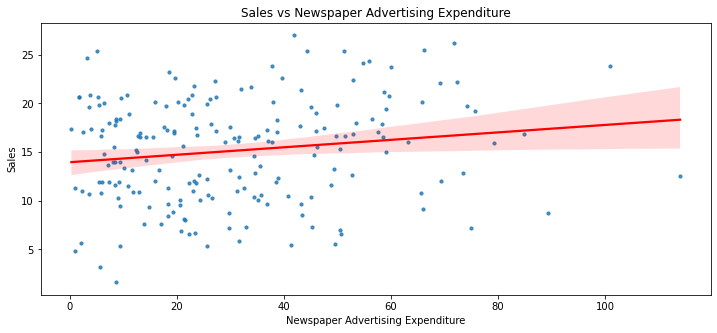

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Sales vs TV with linear regression line
plt.figure(figsize=(12, 5))
sns.regplot(x='TV', y='Sales', data=advertising, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Sales vs TV Advertising Expenditure')
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.show()

# Scatter plot for Sales vs Radio with linear regression line
plt.figure(figsize=(12, 5))
sns.regplot(x='Radio', y='Sales', data=advertising, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Sales vs Radio Advertising Expenditure')
plt.xlabel('Radio Advertising Expenditure')
plt.ylabel('Sales')
plt.show()

# Scatter plot for Sales vs Newspaper with linear regression line
plt.figure(figsize=(12, 5))
sns.regplot(x='Newspaper', y='Sales', data=advertising, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Sales vs Newspaper Advertising Expenditure')
plt.xlabel('Newspaper Advertising Expenditure')
plt.ylabel('Sales')
plt.show()

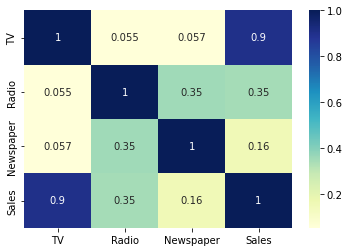

In [21]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [23]:
#spliting data into features and target

In [24]:
X = advertising['TV']
y = advertising['Sales']


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 123)

In [27]:
#Building a Linear Model

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'advertising' is your DataFrame containing the data

# Select the feature (independent variable) and the target (dependent variable)
X = advertising['TV'].values.reshape(-1, 1)
y = advertising['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error (MSE): 6.101072906773964
R-squared (R2) Score: 0.802561303423698


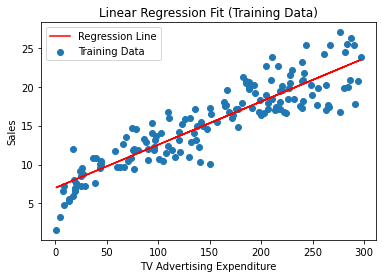

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# Predict y values for the training and testing data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Create a scatter plot for the training data
plt.scatter(X_train, y_train, label='Training Data')

# Plot the regression line for the training data
plt.plot(X_train, y_pred_train, 'r', label='Regression Line')

# Labeling the axes and title
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Linear Regression Fit (Training Data)')
plt.legend()
plt.show()

In [31]:
import statsmodels.api as sm

# Add a constant (intercept) to the predictor variable
X_train = sm.add_constant(X_train)

# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_train, X_train).fit()



# Get the summary of the regression
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     689.1
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           1.71e-59
Time:                        16:52:53   Log-Likelihood:                -355.76
No. Observations:                 160   AIC:                             715.5
Df Residuals:                     158   BIC:                             721.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0071      0.364     19.274      0.0

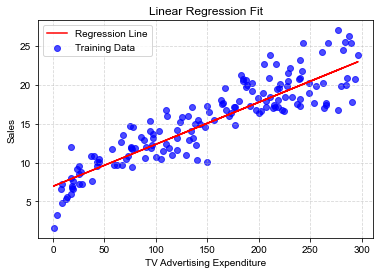

In [32]:
import matplotlib.pyplot as plt

# Create a scatter plot for the training data
plt.scatter(X_train[:, 1], y_train, label='Training Data', color='blue', marker='o', alpha=0.7)

# Calculate the predictions using the equation
y_pred_train = 6.948 + 0.054 * X_train[:, 1]

# Plot the regression line
plt.plot(X_train[:, 1], y_pred_train, 'r', label='Regression Line')

# Add labels and title
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Linear Regression Fit')

# Display the legend
plt.legend()

# Show grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Customize plot style
plt.style.use('seaborn')

# Show the plot
plt.show()

In [ ]:
# Model Performance Evaluation :
# To evaluate the performance of a linear regression model, there are several common metrics and techniques you can use. Here are some of the key methods to assess the performance of the model:

# Model Performance Evaluation on Training dataset
# 1. Mean Squared Error (MSE):
# Calculate the mean squared error between the actual and predicted values. Lower MSE indicates better performance.

In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred_train)
print(mse)

5.09330314125


In [ ]:
# R-squared (R²) Score:
# Determine the coefficient of determination, which measures the proportion of the variance in the dependent variable explained by the model. A higher R² score is better.

In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred_train)
print(r2)

0.809946940348815


In [ ]:
Residual Analysis:
# Examine the distribution of the residuals (differences between actual and predicted values). A random and normally distributed set of residuals is a good sign.

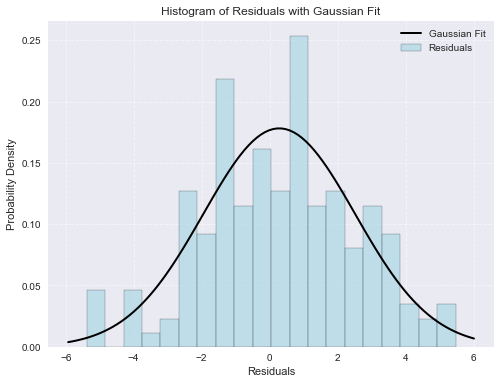

In [35]:
from scipy.stats import norm

# Calculate the residuals
residuals = y_train - y_pred_train

# Create a histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, density=True, edgecolor='k', alpha=0.7, color='lightblue', label='Residuals')

# Fit a Gaussian distribution (PDF) to the residuals
mu, std = norm.fit(residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Overlay the fitted curve on the histogram
plt.plot(x, p, 'k', linewidth=2, label='Gaussian Fit')

plt.xlabel('Residuals')
plt.ylabel('Probability Density')
plt.title('Histogram of Residuals with Gaussian Fit')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

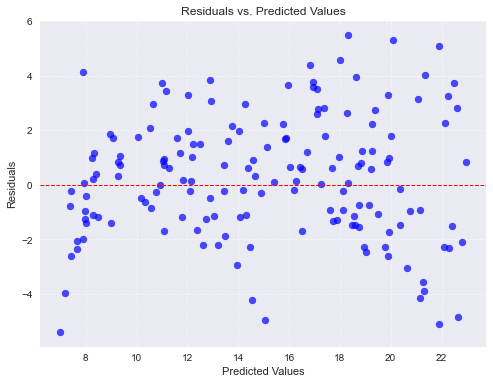

In [36]:
# Create a scatter plot of residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_train, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [37]:
mse_test = mean_squared_error(y_test, y_pred_test)
print(mse_test)

6.101072906773964


In [ ]:
#  R-squared (R²) Score:

In [38]:
r2_test = r2_score(y_test, y_pred_test)
print(r2_test)

0.802561303423698


In [40]:
# Residual Analysis:

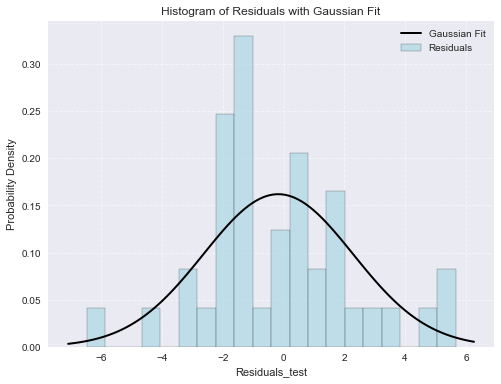

In [43]:
from scipy.stats import norm

# Calculate the residuals
residuals_test = y_test - y_pred_test

# Create a histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals_test, bins=20, density=True, edgecolor='k', alpha=0.7, color='lightblue', label='Residuals')

# Fit a Gaussian distribution (PDF) to the residuals
mu, std = norm.fit(residuals_test)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Overlay the fitted curve on the histogram
plt.plot(x, p, 'k', linewidth=2, label='Gaussian Fit')

plt.xlabel('Residuals_test')
plt.ylabel('Probability Density')
plt.title('Histogram of Residuals with Gaussian Fit')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

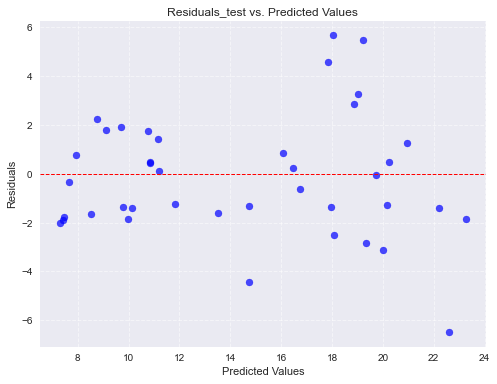

In [44]:
# Create a scatter plot of residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals_test, color='blue', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals_test vs. Predicted Values')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# The model appears to be performing well. The R² values for both training and test data are relatively high, indicating that the model explains a significant portion of the variance in the target variable. The MSE values, while not extremely low, suggest that the model's predictions are reasonably close to the actual values on both the training and test data.

In [ ]:
# Conclusion :
# Our exploration clearly shows the linear relationship between TV advertisements and sales. They should give more ads on TV for higher sales.

# As we have not used all the available machine learning regression algorithms and related techniques, there are strong possibilities to get better results. I would also recommend to explore deep learning to see if we can get better results